# HCIA AI project  - Simple Project
## Team: <br>Mostafa Khaled <br> Mahmoud Hozayn

# Probelm definition:
Our problem consists of classifying flowers to their species based on the features of it. There's 3 types of species we are dealing with in our data set (Iris-setosa, Iris-versicolor, Iris-virginica). Two types of classifying algorithms will be used, KNN and SVM. In SVM, the model takes the data points and outputs a hyperplane between the classes, the hyperplane should maximize the separation of data points to their potential classes. KNN, on the other hand, calculates the distance between the test samples and the labeled train data, it counts the number of instances voted for every class, and based on that voting it classifies the test sample for the most voted (common) class amongst. 



# Aim:
The goal here is to succefully classify (unknown) test samples to each's class (species). KNN is a great algorithm to use in this particular case as the data set is relatively small while the number of classes are only 3.


# Objective of the assignment:
I believe the objective of this assignment is to have hands-on experience with building a classification model from scratch in which KNN was a great candidate, alongside building deep understanding of how KNN works precisely, from building the distance function to getting the majority votes to finally putting everything together in one fucntion and looping over the test samples.


# Expected outcomes:
The general expected outcome is to accurately predict each sample from the dataset that isn't class labeled. In our case, a high success rate is expected as the number of features is small, while the dataset is clean with no noise apparent.<br>
After fitting and training the model with our train data to both KNN and SVM, and testing their accuracy score along with other performance metrix, it will be clear which model is more suitable in the prediction flower's species relative to our dataset's distribution and number of features.

# Data
The dataset we are working on is the Iris dataset from sci-kit learn. It shows records of flowers' petal and sepal dimentions with mentioning its species. 

In [1]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import *
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### The dataset is for 3 species of flowers with each's sepal and petal dimenstions <br> Goal: 
classify the spiece of the flower given using KNN model. The expected outcome will fall between the 3 species in the dataset (setosa, versicolor, virginica) in which it will be classified under the highest similarity between the test and train samples.

### Both sepal length and width looks normally distributed, as the mean is almost equal to the median with  low standard deviation <br>On the other hand, petal length looks a bit skewed, will look more into it

<Axes: >

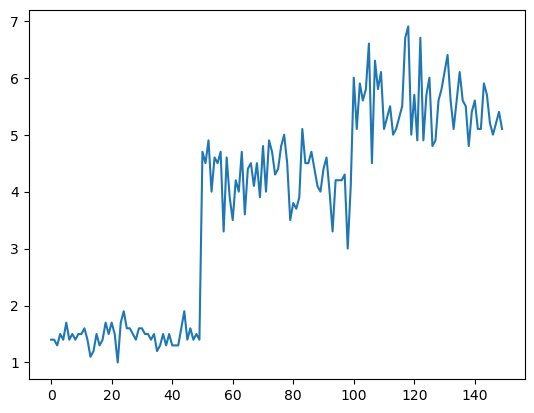

In [9]:
df['PetalLengthCm'].plot.line()

c:\Users\Mostafa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PetalLengthCm', ylabel='Count'>

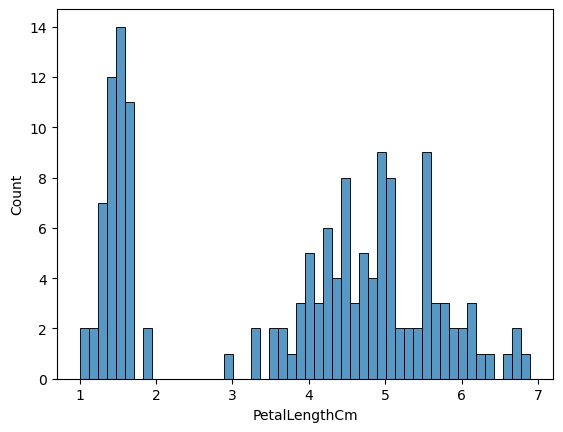

In [10]:
sns.histplot(df['PetalLengthCm'],bins = 50)

<Axes: >

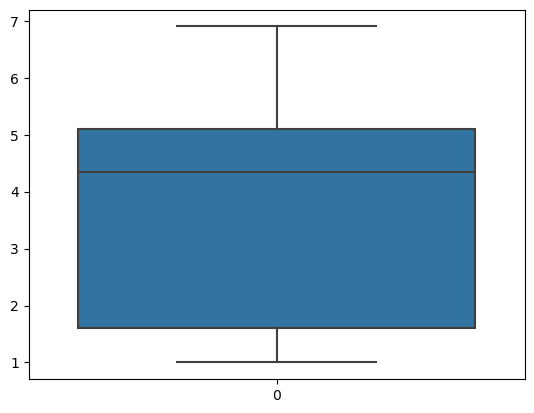

In [11]:
sns.boxplot(df['PetalLengthCm'])

<Axes: >

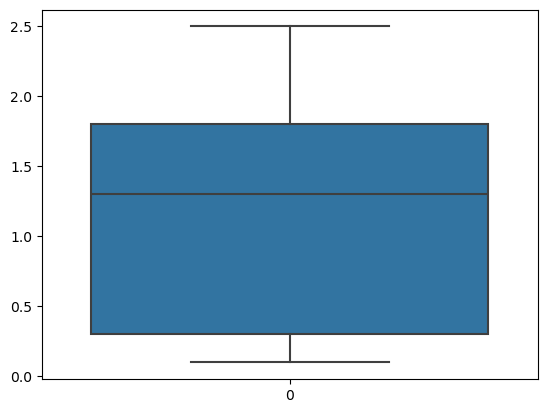

In [12]:
sns.boxplot(df['PetalWidthCm'])

<Axes: >

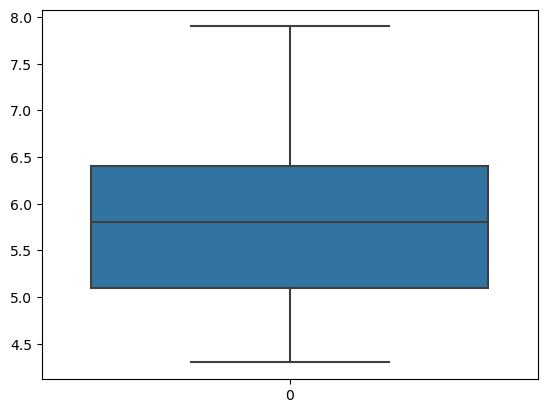

In [13]:
sns.boxplot(df['SepalLengthCm'])

<Axes: >

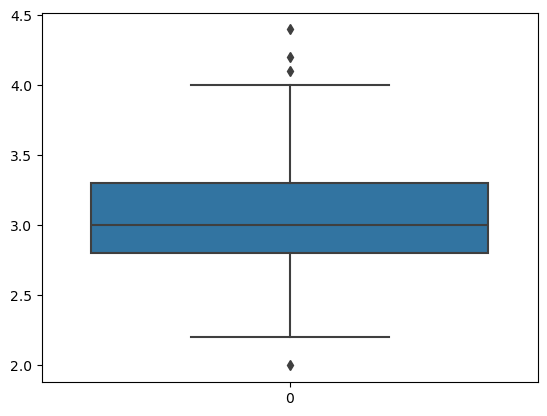

In [14]:
sns.boxplot(df['SepalWidthCm'])

# Outliers:
There's clear outliers in sepal width. I will approach this by first calculating the lower and upper bounds then getting the outlier values, after that I will be removing them from the dataframe.

In [15]:
# Calculate the IQR for 'SepalWidthCm'
Q1 = df['SepalWidthCm'].quantile(0.25) # First quartile
Q3 = df['SepalWidthCm'].quantile(0.75) # Third quartile
IQR = Q3 - Q1

# Get the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers values
outliers = df[(df['SepalWidthCm'] < lower_bound) | (df['SepalWidthCm'] > upper_bound)]

print(f"Outliers in 'SepalWidthCm'",'\n',outliers)

# Remove outliers
df_cleaned = df[(df['SepalWidthCm'] >= lower_bound) & (df['SepalWidthCm'] <= upper_bound)]

print(f"Data shape before removing outliers: ",df.shape)
print(f"Data shape after removing outliers: ",df_cleaned.shape)


Outliers in 'SepalWidthCm' 
     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  
Data shape before removing outliers:  (150, 6)
Data shape after removing outliers:  (146, 6)


In [16]:
df_cleaned.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df_cleaned.duplicated().sum()

0

In [18]:
(df_cleaned.select_dtypes(include=[float, int]) < 0).any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

## Data is clean, there's no duplicates nor missing values. Got rid of outliers in sepal width <br> Petal length has some skewness to the left, but still close enoguh to be considered normally distributed

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

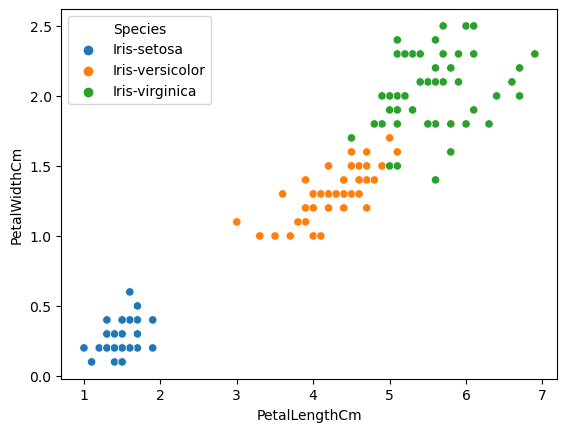

In [19]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df_cleaned)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

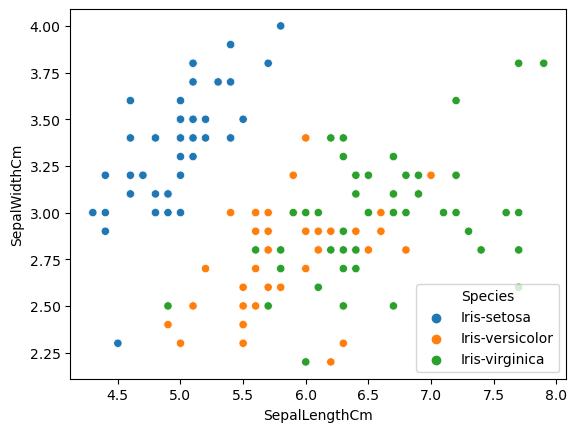

In [20]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df_cleaned) 

# Conclusion about the data
The 3 species are equal in numbers. 
Setosa has small sepal length while having large sepal width, Versicolor is positioned between Setosa and Virginica middling in sepal length and width. Opposite to Setosa, Virginica has large sepal len with small sepal width.<br><br>
Focusing on petal dimenstions differences, Setosa has the smallest petal length and width, while Versicolor lies in the middle between the other two species, and Virginica with the highest petal length and width.<br>
Looking with a broad view, Setosa is averaged to be the lowest in dimentions among the other two species, Versicolor is the average of Setosa and Virginica, while Virginica is positioned the highest.


In [21]:
def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [22]:
def calculate_distances(X_train, test_point):
    """Calculate the distances from the test point to all training points."""
    return np.array([euclidean_distance(test_point, x_train_sample) for x_train_sample in X_train])

In [23]:
def get_k_nearest_neighbors(distances, k):
    """Get the indices of the k-nearest neighbors."""
    return distances.argsort()[:k]

In [24]:
from collections import Counter

def majority_vote(neighbors_labels):
    """Determine the most common label among the neighbors."""
    return Counter(neighbors_labels).most_common(1)[0][0]

In [25]:
# KNN algorithm
def knn(X_train, y_train, X_test, k=3):
    """KNN algorithm to predict the class for each point in X_test."""
    y_pred = np.empty(X_test.shape[0], dtype=y_train.dtype)

    for i, test_point in enumerate(X_test):
        distances = calculate_distances(X_train, test_point)
        k_indices = get_k_nearest_neighbors(distances, k)
        k_nearest_labels = y_train[k_indices]
        y_pred[i] = majority_vote(k_nearest_labels)

    return y_pred

In [26]:
df_cleaned = df_cleaned.drop(columns=['Id'])
X = df_cleaned.drop(columns=['Species']).values
y = df_cleaned['Species'].values

# Scaling and normalizing the features
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)

# Splitting the data to test and train sets
X_train,X_test,y_train,y_test = train_test_split( X_normalized, y, test_size = 0.2, random_state = 42)

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [27]:
k_list = [ i for i in range(1,31) ]

# Hyperparameter tuning
Here I'm searching for the best K value to use with the highets accuracy, this is done by calculating the accuracy of KNN model withing the range of [1,30], then getting the index of the highest accuracy which is K.

In [28]:
scores = []
for i in k_list:
    y_pred_test = knn(X_train,y_train,X_test,i)
    accuracy = accuracy_score(y_test, y_pred_test)
    scores.append(accuracy)

In [29]:
best_k = k_list[np.argmax(scores)]
best_k

7

In [30]:
# KNN predicition
k = best_k
y_pred_knn = knn(X_train,y_train,X_test,k)

In [37]:
svm_model_linear = SVC(kernel='linear')

svm_model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [38]:
# SVM prediction

y_pred_svm_linear = svm_model_linear.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred_svm)
# print("Accuracy:", accuracy)


In [39]:
# Performance results
# Using average='micro' as it calculates metrics globally by counting the total true positives, false negatives and false positives.

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lin = accuracy_score(y_test, y_pred_svm_linear)

precision_knn = precision_score(y_test, y_pred_knn, average='micro')
precision_lin = precision_score(y_test, y_pred_svm_linear,average='micro')

recall_knn = recall_score(y_test, y_pred_knn,average='micro')
recall_lin = recall_score(y_test, y_pred_svm_linear,average='micro')

f1_score_knn = f1_score(y_test, y_pred_knn,average='micro')
f1_score_lin = f1_score(y_test, y_pred_svm_linear,average='micro')



print("Accuracy for KNN:", accuracy_knn)
print("Accuracy for SVM (linear):", accuracy_lin)

print("\nPrecision for KNN:", precision_knn)
print("Precision for SVM (linear):", precision_lin)

print("\nRecall score for KNN:", recall_knn)
print("Recall score for SVM (linear):", recall_lin)

print("\nF1 score for KNN:", f1_score_knn)
print("F1 score for SVM (linear):", f1_score_lin)





Accuracy for KNN: 0.9666666666666667
Accuracy for SVM (linear): 0.9666666666666667

Precision for KNN: 0.9666666666666667
Precision for SVM (linear): 0.9666666666666667

Recall score for KNN: 0.9666666666666667
Recall score for SVM (linear): 0.9666666666666667

F1 score for KNN: 0.9666666666666667
F1 score for SVM (linear): 0.9666666666666667


# Refrences
HCIA Lab 2 materials <br>
https://builtin.com/data-science/when-and-why-standardize-your-data <br>
https://medium.com/@madhuri15/knn-classifier-implementation-best-practices-and-tips-part-i-6288181c8eed <br>
https://www.geeksforgeeks.org/ml-feature-scaling-part-2/ <br>
https://scikit-learn.org/stable/modules/svm.html <br>